# **Load Libraries**

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

# **Load Data & Clean it**

In [192]:
# Load the dataset into a Pandas DataFrame
# Make sure to adjust the file path based on your dataset's location
DATA='/kaggle/input/pinktober/data.csv'
df = pd.read_csv(DATA)
df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


# **Preparing the target**

In [193]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [194]:
# Define a mapping from 'B' to 0 and 'M' to 1
diagnosis_mapping = {'B': 0, 'M': 1}

# Apply the mapping to the 'Diagnosis' column
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We notice that Unamed: 32 have 0 non-null which means that all the values inside that columns is NULL & we can't use them for our analysis.

In [196]:
df.drop("Unnamed: 32",axis=1,inplace=True) # In this instruction we change the data (Removing Unnamed: 32 column)
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [197]:
y = df['diagnosis']  
X = df.drop(['diagnosis', 'id'], axis=1)

In [198]:
for i in range(100):
# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=i)


    regressor = RandomForestRegressor(random_state=i)
    regressor.fit(X_train, y_train)

# Make predictions on the test set
    y_pred = regressor.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

    accuracy = accuracy_score(y_test, y_pred_binary)

    print("i : ", i,", accuracy: ",round(accuracy,5))

i :  0 , accuracy:  0.98601
i :  1 , accuracy:  0.95804
i :  2 , accuracy:  0.94406
i :  3 , accuracy:  0.93706
i :  4 , accuracy:  0.91608
i :  5 , accuracy:  0.97902
i :  6 , accuracy:  0.93706
i :  7 , accuracy:  0.98601
i :  8 , accuracy:  0.97902
i :  9 , accuracy:  0.97203
i :  10 , accuracy:  0.99301
i :  11 , accuracy:  0.98601
i :  12 , accuracy:  0.91608
i :  13 , accuracy:  0.8951
i :  14 , accuracy:  0.94406
i :  15 , accuracy:  0.94406
i :  16 , accuracy:  0.95804
i :  17 , accuracy:  0.95804
i :  18 , accuracy:  0.93706
i :  19 , accuracy:  0.93007
i :  20 , accuracy:  0.95804
i :  21 , accuracy:  0.97902
i :  22 , accuracy:  0.95105
i :  23 , accuracy:  0.96503
i :  24 , accuracy:  0.96503
i :  25 , accuracy:  0.94406
i :  26 , accuracy:  0.97203
i :  27 , accuracy:  0.95105
i :  28 , accuracy:  0.94406
i :  29 , accuracy:  0.95804
i :  30 , accuracy:  0.96503
i :  31 , accuracy:  0.97203
i :  32 , accuracy:  0.96503
i :  33 , accuracy:  0.93706
i :  34 , accuracy:  0.96

We picked the value 41 for random state as we notice it has the higher accuracy.

Next code, Contains the test we did to find the perfect values for the choosen criterion & test_size. 

squared_error :  0.96503
friedman_mse :  0.96503
absolute_error :  0.97902
poisson :  0.96503


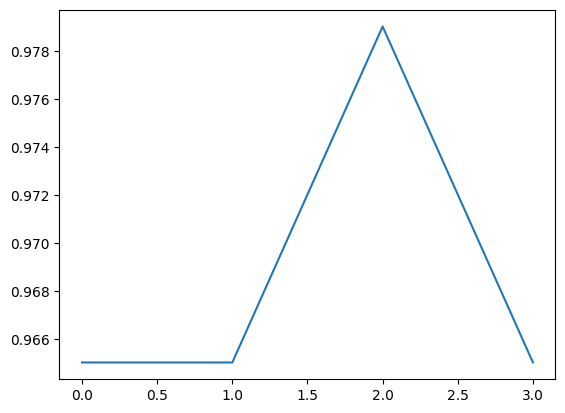

In [199]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

accuracies = []

for criterion in ["squared_error", "friedman_mse", "absolute_error", "poisson"]:
    regressor = RandomForestRegressor(criterion=criterion,random_state=41)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracies.append(accuracy)
    
    print(criterion,": ",round(accuracy, 5))


import matplotlib.pyplot as plt
plt.plot(range(4), accuracies)



In [200]:
#test_size
for j in np.arange(0.01, 1.0, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = round(j, 2), random_state=41)
    
    regressor = RandomForestRegressor(criterion='squared_error',random_state=41)
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("j : ", round(j, 2),", accuracy: ",round(accuracy, 5))

j :  0.01 , accuracy:  1.0
j :  0.02 , accuracy:  1.0
j :  0.03 , accuracy:  1.0
j :  0.04 , accuracy:  1.0
j :  0.05 , accuracy:  0.96552
j :  0.06 , accuracy:  1.0
j :  0.07 , accuracy:  0.975
j :  0.08 , accuracy:  1.0
j :  0.09 , accuracy:  1.0
j :  0.1 , accuracy:  0.98246
j :  0.11 , accuracy:  0.95238
j :  0.12 , accuracy:  0.95652
j :  0.13 , accuracy:  1.0
j :  0.14 , accuracy:  0.9875
j :  0.15 , accuracy:  0.95349
j :  0.16 , accuracy:  0.96739
j :  0.17 , accuracy:  0.95876
j :  0.18 , accuracy:  0.97087
j :  0.19 , accuracy:  0.98165
j :  0.2 , accuracy:  0.98246
j :  0.21 , accuracy:  0.96667
j :  0.22 , accuracy:  0.96825
j :  0.23 , accuracy:  0.9771
j :  0.24 , accuracy:  0.9781
j :  0.25 , accuracy:  0.99301
j :  0.26 , accuracy:  0.97297
j :  0.27 , accuracy:  0.98052
j :  0.28 , accuracy:  0.975
j :  0.29 , accuracy:  0.98193
j :  0.3 , accuracy:  0.9883
j :  0.31 , accuracy:  0.9887
j :  0.32 , accuracy:  0.98907
j :  0.33 , accuracy:  0.98936
j :  0.34 , accuracy:

# **Recap:**
- Test n°1: We first did a test to find the best random_state value to use for the RandomForestRegressor Model, after trying 100 values, we got  the best accuracy with random_state=41 and we picked it to do further tests trying to increase the accuracy.
- Test n°2: After choosing the right value for random_state we started doing test on criterion ( as the code shown higher ) and we found that with the squared_error we generally get the best accuracy possible.
- Test n°3: Now that we choosed a criterion & the value for random_state, it's time to get the right value for the test_size, We did the same algorithm we did for random_state and we found that the best value is 0.25, with an accuracy of .99301 ( We also got an accuracy of 100% but we didnt count it since the test_size for example was only 8% which is low and inside the data we can find parts of 8% total size that have exactly the same diagnosis all the long ( M or B ) so 0.25 is a wiser choice .

# **Final Code:**

In [201]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
regressor = RandomForestRegressor(criterion='squared_error',random_state=41)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print(round(accuracy,5))

0.99301
